In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data/data.csv', encoding='latin-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [14]:
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data = df.select_dtypes(include = ['object'])

numerical_stats = numerical_data.describe()
categorical_stats = categorical_data.describe()

numerical_stats.T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [15]:
categorical_stats.T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


## 타겟값 분석

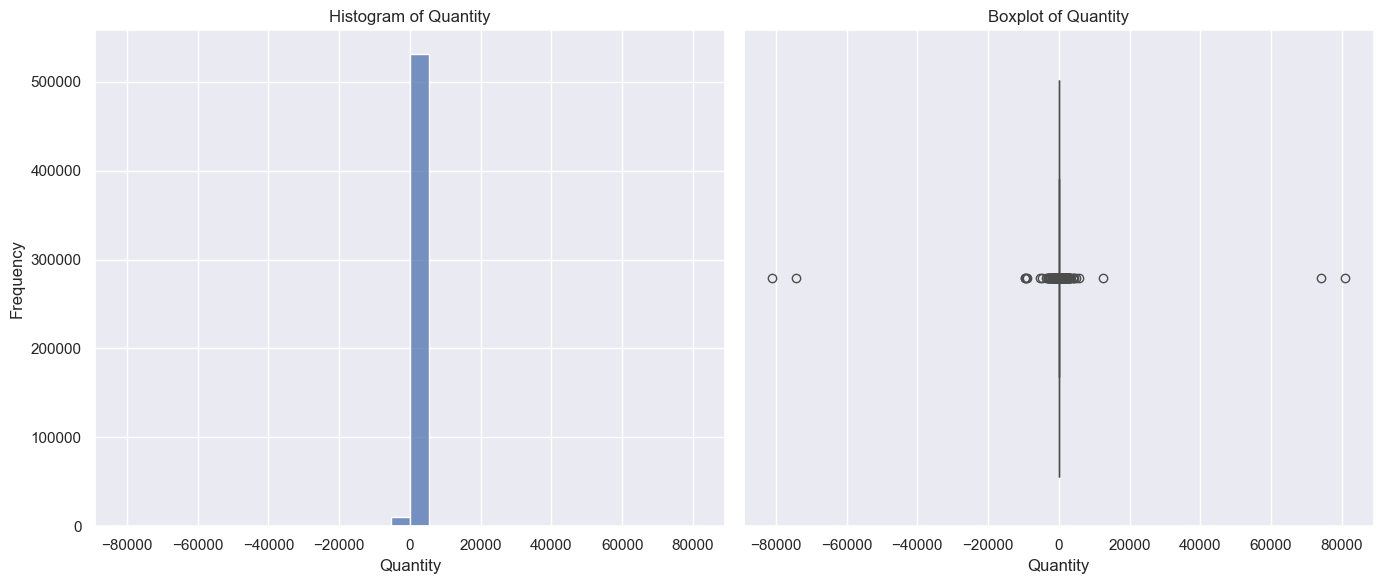

In [18]:
import seaborn as sns

sns.set_theme()

fig, axes = plt.subplots(1, 2, figsize = (14, 6))

sns.histplot(df['Quantity'], bins=30, ax=axes[0], kde=False)
axes[0].set_title('Histogram of Quantity')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=df['Quantity'], ax=axes[1])
axes[1].set_title('Boxplot of Quantity')
axes[1].set_xlabel('Quantity')

plt.tight_layout()
plt.show()

In [21]:
## 상위5퍼, 하위5퍼 제거

per_5 = df['Quantity'].quantile(0.05)
per_95 = df['Quantity'].quantile(0.95)

print(per_5, per_95)

1.0 29.0


In [22]:
filtered_df = df[(df['Quantity'] >= per_5) & (df['Quantity'] <= per_95)]
filtered_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


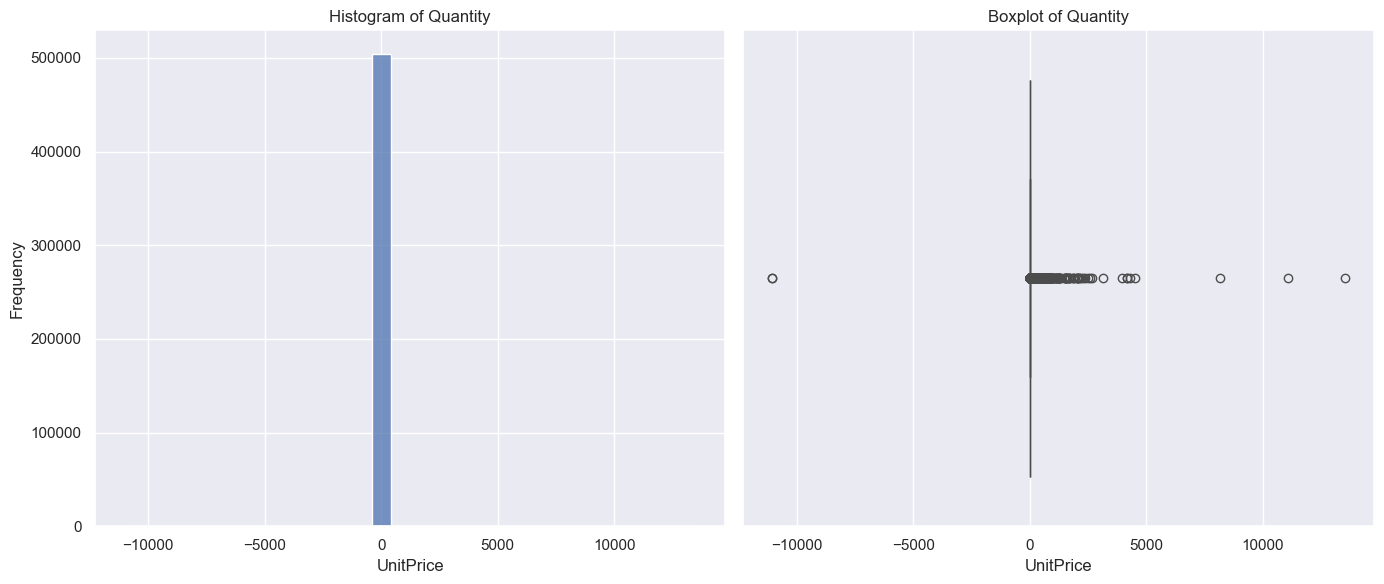

In [23]:
import seaborn as sns

sns.set_theme()

fig, axes = plt.subplots(1, 2, figsize = (14, 6))

sns.histplot(filtered_df['UnitPrice'], bins=30, ax=axes[0], kde=False)
axes[0].set_title('Histogram of Quantity')
axes[0].set_xlabel('UnitPrice')
axes[0].set_ylabel('Frequency')

sns.boxplot(x=filtered_df['UnitPrice'], ax=axes[1])
axes[1].set_title('Boxplot of Quantity')
axes[1].set_xlabel('UnitPrice')

plt.tight_layout()
plt.show()

In [27]:
unit_per_5 = df['UnitPrice'].quantile(0.05)
unit_per_95 = df['UnitPrice'].quantile(0.95)

cleaned_data = filtered_df[ (filtered_df['UnitPrice']> 0) & (filtered_df['UnitPrice'] <= unit_per_95)]
cleaned_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<Axes: ylabel='UnitPrice'>

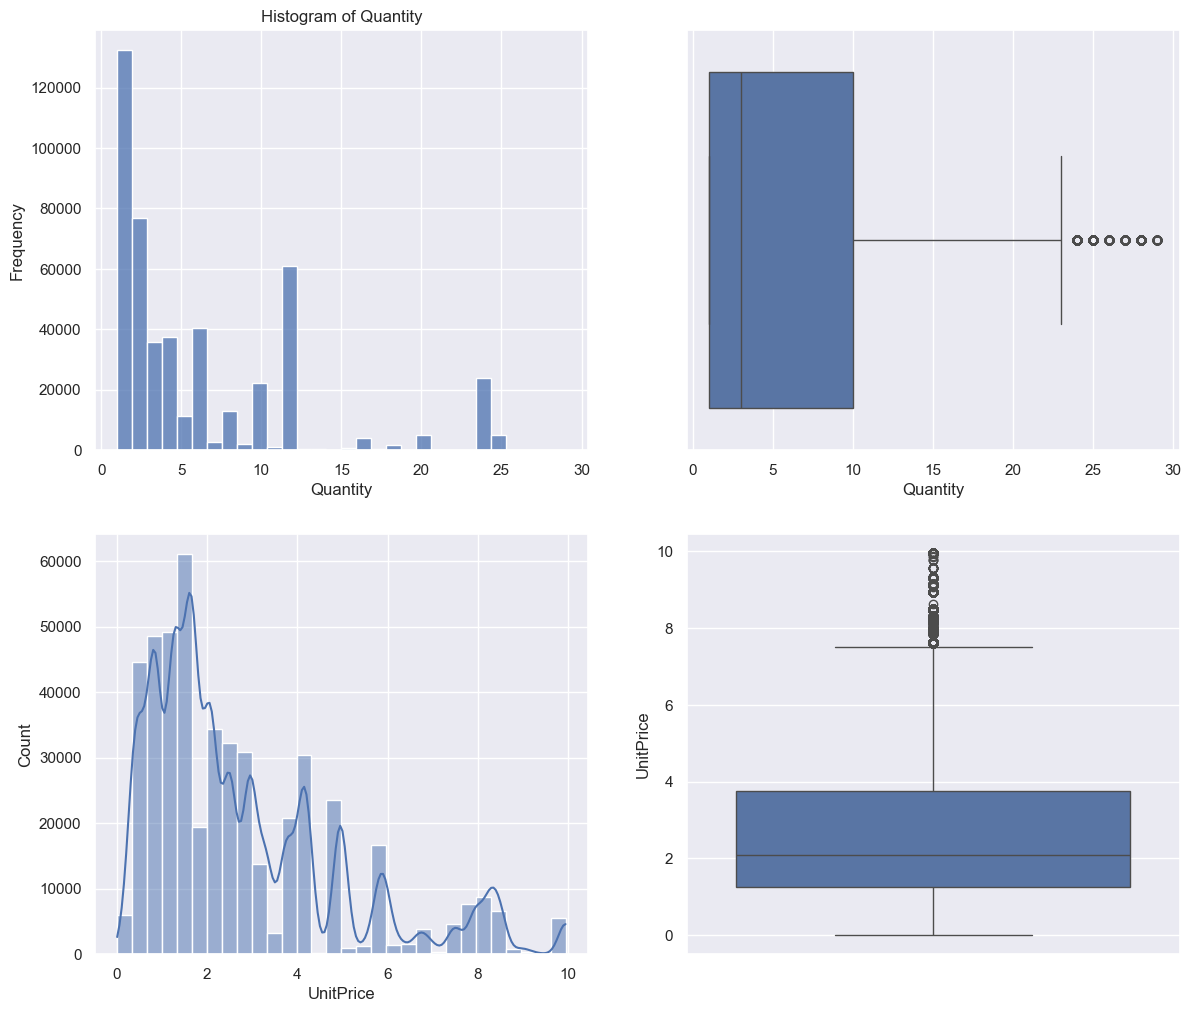

In [31]:
fig, axes = plt.subplots(2, 2, figsize = (14, 12))

sns.histplot(cleaned_data['Quantity'], bins=30, ax = axes[0, 0], kde=False)

axes[0, 0].set_title('Histogram of Quantity')
axes[0, 0].set_xlabel('Quantity')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(x=cleaned_data['Quantity'], ax = axes[0, 1])

sns.histplot(cleaned_data['UnitPrice'], bins=30, ax = axes[1,0], kde=True)
sns.boxplot(cleaned_data['UnitPrice'], ax = axes[1, 1])



## 범주형 분석

C:\Users\KJY\AppData\Local\Temp\ipykernel_24408\2492684164.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stockcode_counts.values, y=stockcode_counts.index, palette='Set2')


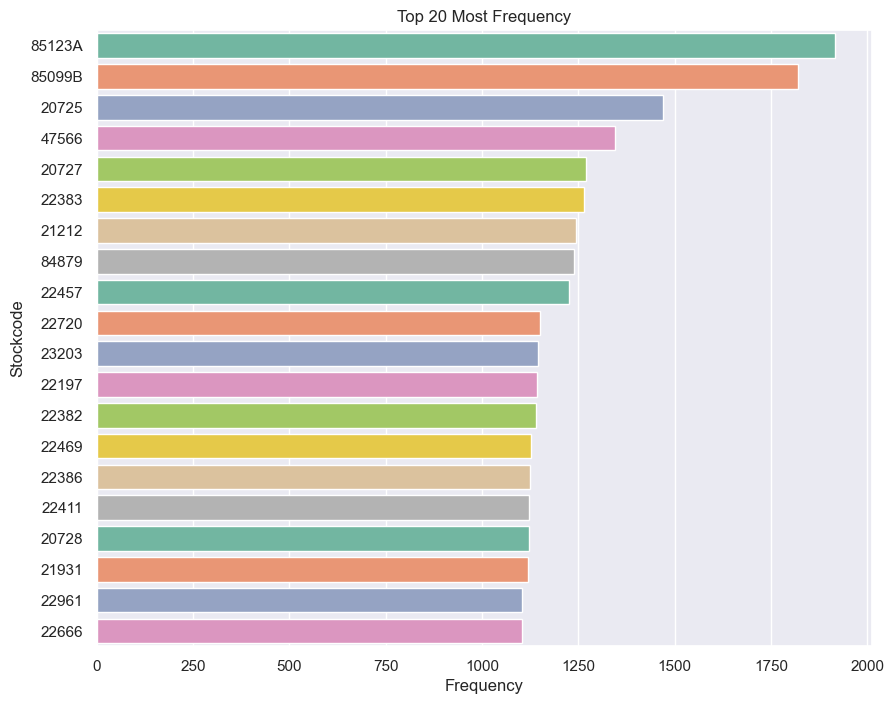

In [32]:
stockcode_counts = cleaned_data['StockCode'].value_counts().head(20)

plt.figure(figsize=(10, 8))
sns.barplot(x=stockcode_counts.values, y=stockcode_counts.index, palette='Set2')
plt.title('Top 20 Most Frequency')
plt.xlabel('Frequency')
plt.ylabel('Stockcode')
plt.show()

In [43]:
cleaned_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [47]:
stockcode_description_count = cleaned_data.groupby('StockCode')['Description'].nunique()

stockcode_description_count_df = stockcode_description_count.reset_index()
stockcode_description_count_df.columns = ['StockCode', 'UniqueDescription']

print(stockcode_description_count_df.max())
print(stockcode_description_count_df.min())

StockCode            m
UniqueDescription    4
dtype: object
StockCode            10002
UniqueDescription        1
dtype: object


C:\Users\KJY\AppData\Local\Temp\ipykernel_24408\2514698710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['date'] = pd.to_datetime(cleaned_data['InvoiceDate']).dt.date


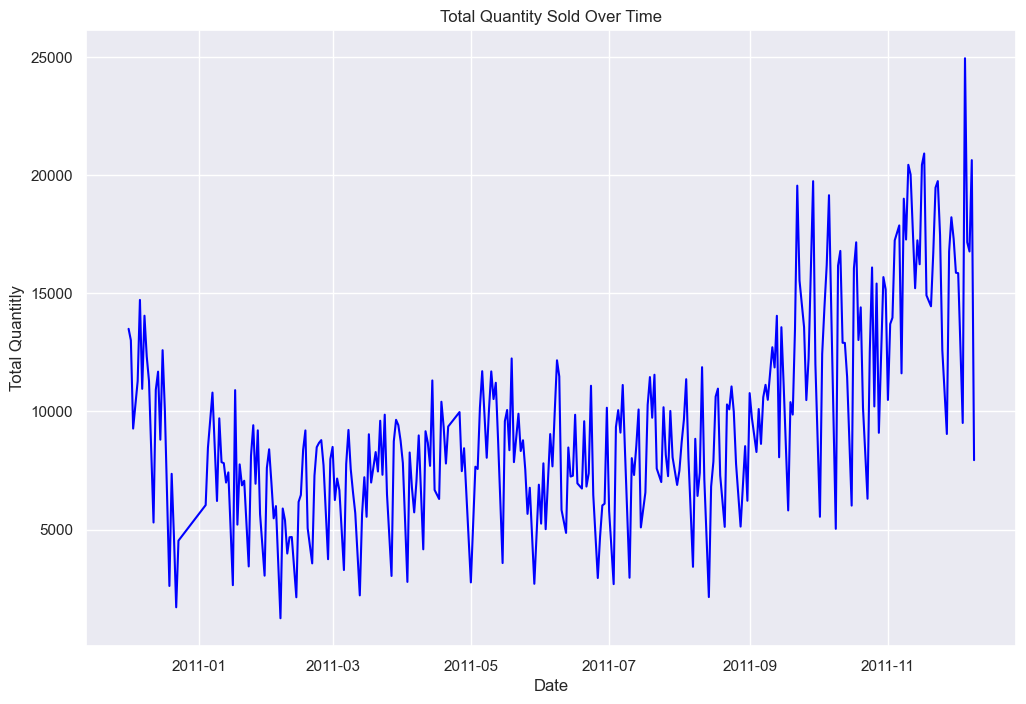

In [52]:
cleaned_data['date'] = pd.to_datetime(cleaned_data['InvoiceDate']).dt.date

date_quantitly_sum = cleaned_data.groupby('date')['Quantity'].sum()

plt.figure(figsize = (12, 8))
date_quantitly_sum.plot(kind='line', color='blue')
plt.title('Total Quantity Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantitly')
plt.grid(True)
plt.show()

## 시계열 분석을 위한 피처 추가

1. 시간관련 파생변수
- 년, 월, 일
- 요일
- 주

2. 공휴일 및 이벤트
- 공휴일 표시

3. 시즌성 인코딩
- 계절변수

4. 래그피처(Lag Feature)

5. 이동 평균
- ACF를 통해 값 결정 가능

6. 차분 
- 트랜드나 계절성을 제거 가능

In [53]:
# Group by StockCode and date, and sum the Quantity
stockcode_date_quantity = cleaned_data.groupby(['StockCode', 'date'])['Quantity'].sum().reset_index()

# Add year, month, day, weekday, and week features
stockcode_date_quantity['year'] = pd.to_datetime(stockcode_date_quantity['date']).dt.year
stockcode_date_quantity['month'] = pd.to_datetime(stockcode_date_quantity['date']).dt.month
stockcode_date_quantity['day'] = pd.to_datetime(stockcode_date_quantity['date']).dt.day
stockcode_date_quantity['weekday'] = pd.to_datetime(stockcode_date_quantity['date']).dt.weekday
stockcode_date_quantity['week'] = pd.to_datetime(stockcode_date_quantity['date']).dt.isocalendar().week

# Add lag feature
stockcode_date_quantity['lag_1'] = stockcode_date_quantity.groupby('StockCode')['Quantity'].shift(1)

# Add seasonality feature for October and November
stockcode_date_quantity['is_oct_nov'] = stockcode_date_quantity['month'].apply(lambda x: 1 if x in [10, 11] else 0)

stockcode_date_quantity.head()

,StockCode,date,Quantity,year,month,day,weekday,week,lag_1,is_oct_nov
0,10002,2010-12-01,12,2010,12,1,2,48,NaN,0
1,10002,2010-12-02,1,2010,12,2,3,48,12.0,0
2,10002,2010-12-03,8,2010,12,3,4,48,1.0,0
3,10002,2010-12-05,1,2010,12,5,6,48,8.0,0
4,10002,2010-12-06,25,2010,12,6,0,49,1.0,0


In [54]:
stockcode_date_quantity.shape

(257338, 10)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
stockcode_date_quantity['StockCode'] = label_encoder.fit_transform(stockcode_date_quantity['StockCode'])
stockcode_date_quantity['lag_1'] = stockcode_date_quantity['lag_1'].fillna(9.628)

x = stockcode_date_quantity[['StockCode', 'year', 'month', 'day', 'weekday', 'week', 'lag_1', 'is_oct_nov']]
y = stockcode_date_quantity['Quantity']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 138.68671903707158


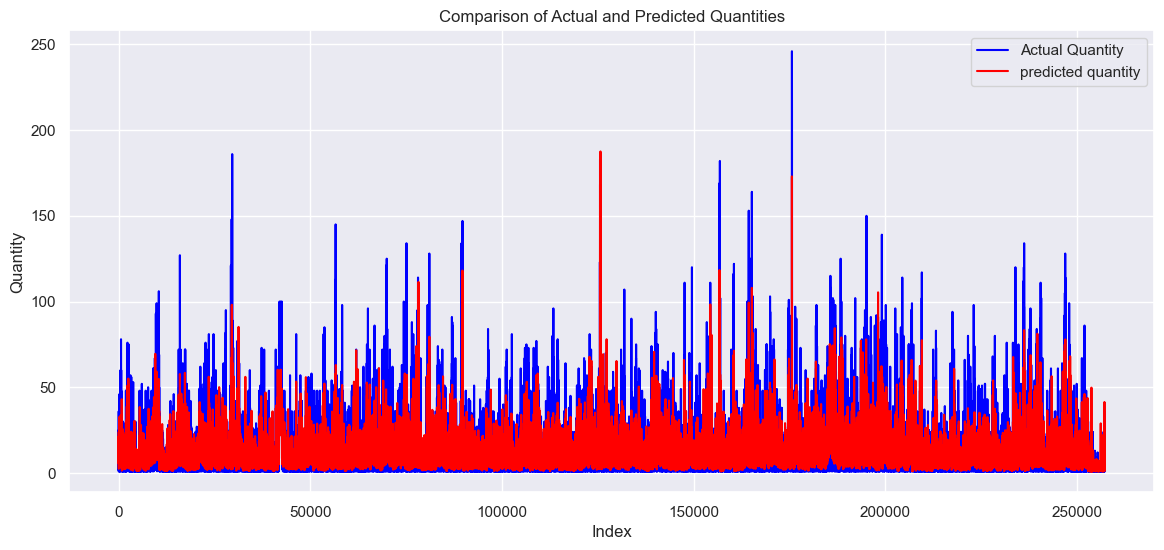

In [68]:
comparison_df = pd.DataFrame({'Actual Quantity' : y_test, 'predicted quantity': predictions})

comparison_df.sort_index(inplace=True)

plt.figure(figsize=(14, 6))
plt.plot(comparison_df['Actual Quantity'], label='Actual Quantity', color='blue')
plt.plot(comparison_df['predicted quantity'], label='predicted quantity', color='red')
plt.title('Comparison of Actual and Predicted Quantities')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()


## 예측모델의 성능을 좋게하기 위해서

1. 이상치 처리

2. 피처 변환
- 로그 변환
- 다항 피처

3. 시계열 특성 강화
- 계절성 인덱스 추가
- 휴일 및 이벤트 표시

4. 시계열 분해
- 트랜드 및 계절성 분해

5. 라그와 롤링 윈도우 통계


In [69]:
# Calculate mean, min, and max daily sales for each StockCode
stock_stats = stockcode_date_quantity.groupby('StockCode')['Quantity'].agg(['mean', 'min', 'max']).reset_index()
stockcode_date_quantity = stockcode_date_quantity.merge(stock_stats, on='StockCode', how='left')

stockcode_date_quantity.head()

,StockCode,date,Quantity,year,month,day,weekday,week,lag_1,is_oct_nov,mean,min,max
0,0,2010-12-01,12,2010,12,1,2,48,9.628,0,9.627907,1,44
1,0,2010-12-02,1,2010,12,2,3,48,12.000,0,9.627907,1,44
2,0,2010-12-03,8,2010,12,3,4,48,1.000,0,9.627907,1,44
3,0,2010-12-05,1,2010,12,5,6,48,8.000,0,9.627907,1,44
4,0,2010-12-06,25,2010,12,6,0,49,1.000,0,9.627907,1,44


In [70]:
# Create a new column 'QuantityGroup' by dividing 'Quantity' into 10 equal-sized bins
stockcode_date_quantity['QuantityGroup'] = pd.qcut(stockcode_date_quantity['Quantity'], 10, labels=False, duplicates='drop')

stockcode_date_quantity.head()

,StockCode,date,Quantity,year,month,day,weekday,week,lag_1,is_oct_nov,mean,min,max,QuantityGroup
0,0,2010-12-01,12,2010,12,1,2,48,9.628,0,9.627907,1,44,4
1,0,2010-12-02,1,2010,12,2,3,48,12.000,0,9.627907,1,44,0
2,0,2010-12-03,8,2010,12,3,4,48,1.000,0,9.627907,1,44,3
3,0,2010-12-05,1,2010,12,5,6,48,8.000,0,9.627907,1,44,0
4,0,2010-12-06,25,2010,12,6,0,49,1.000,0,9.627907,1,44,6


In [71]:
stockcode_date_quantity['QuantityGroup'].value_counts()

QuantityGroup
0    78371
1    33889
6    25269
2    25242
7    24928
4    24649
3    22942
5    22048
Name: count, dtype: int64

In [73]:
# Filter the dataset to include only StockCode from 0 to 100
filtered_stockcode_data = stockcode_date_quantity[stockcode_date_quantity['StockCode'].between(0, 100)]


# Define the feature set and target variable
X_new = filtered_stockcode_data[['StockCode', 'year', 'month', 'day', 'weekday', 'week', 'lag_1', 'is_oct_nov', 'mean', 'min', 'max', 'QuantityGroup']]
y_new = filtered_stockcode_data['Quantity']

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Train the RandomForestRegressor model
model_new = RandomForestRegressor(n_estimators=100, random_state=42)
model_new.fit(X_train_new, y_train_new)

# Make predictions and calculate the mean squared error
predictions_new = model_new.predict(X_test_new)
mse_new = mean_squared_error(y_test_new, predictions_new)
print(f'Mean Squared Error: {mse_new}')
print(f'rmse: {np.sqrt(mse_new)}')

Mean Squared Error: 21.20342421052632
rmse: 4.604717603776188


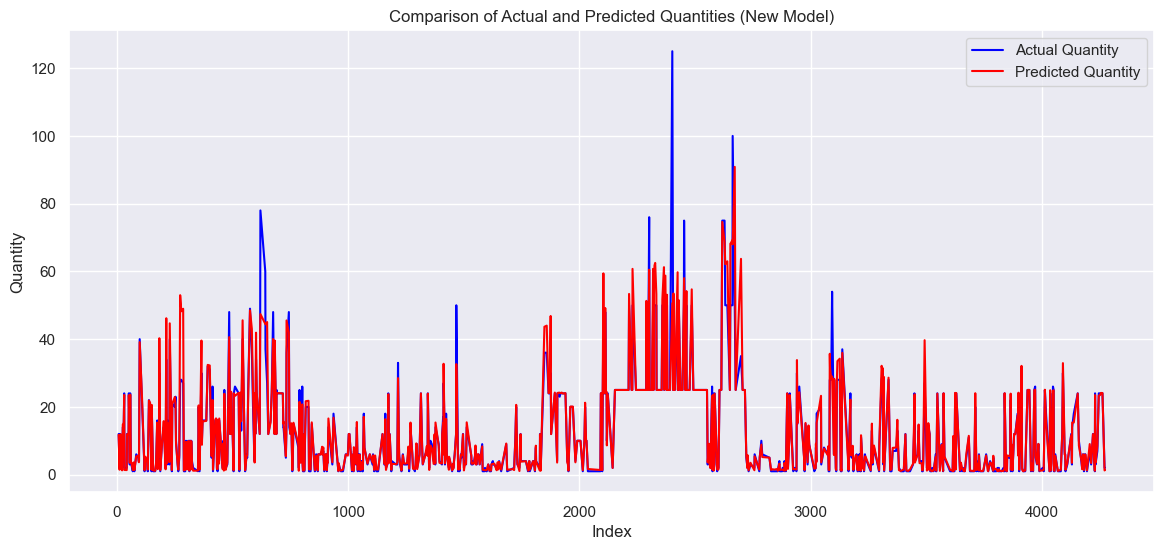

In [74]:
comparison_df_new = pd.DataFrame({'Actual Quantity': y_test_new, 'Predicted Quantity': predictions_new})

comparison_df_new.sort_index(inplace=True)

plt.figure(figsize=(14, 6))
plt.plot(comparison_df_new['Actual Quantity'], label='Actual Quantity', color='blue')
plt.plot(comparison_df_new['Predicted Quantity'], label='Predicted Quantity', color='red')
plt.title('Comparison of Actual and Predicted Quantities (New Model)')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()